In [34]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
df = pd.read_csv("C:/Users/LENOVO/Desktop/Research_Paper/creditcard_data.csv")

In [36]:
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [37]:
legit_sample =legit.sample(n=492) 

In [38]:
df_new= pd.concat([legit_sample,fraud],axis=0)

In [39]:
X=df_new.drop(columns='Class',axis=1)
y=df_new['Class']

In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # Import XGBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize individual models
log_reg = LogisticRegression()
svc = SVC(probability=True)  # Enable probability estimates for VotingClassifier
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()  # Initialize XGBoost classifier

# Voting Classifier (now includes XGBoost)
voting_clf = VotingClassifier(estimators=[
    ('lr', log_reg), 
    ('svc', svc), 
    ('rf', random_forest), 
    ('xgb', xgboost)],   # Add XGBoost here
    voting='soft')

# Train the voting classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier Accuracy: 0.9390862944162437
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        99
           1       0.98      0.90      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



In [41]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # Import XGBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base models (now including XGBoost)
base_models = [
    ('log_reg', LogisticRegression()),
    ('svc', SVC(probability=True)),  # Enable probability estimates for SVM
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier())  # Add XGBoost here
]

# Meta-model (final estimator)
meta_model = LogisticRegression()

# Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Classifier Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Stacking Classifier Accuracy: 0.934010152284264
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        99
           1       0.97      0.90      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

[[96  3]
 [10 88]]


In [10]:
import numpy as np

# Train individual models
log_reg.fit(X_train, y_train)
svc.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Predict probabilities
log_reg_pred = log_reg.predict_proba(X_test)
svc_pred = svc.predict_proba(X_test)
rf_pred = random_forest.predict_proba(X_test)

# Average the predictions (blending)
blended_pred = (log_reg_pred + svc_pred + rf_pred) / 3
blended_pred_class = np.argmax(blended_pred, axis=1)

# Evaluate
accuracy = accuracy_score(y_test, blended_pred_class)
print(f'Blended Classifier Accuracy: {accuracy}')
print(classification_report(y_test, blended_pred_class))


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Blended Classifier Accuracy: 0.9289340101522843
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        99
           1       0.97      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



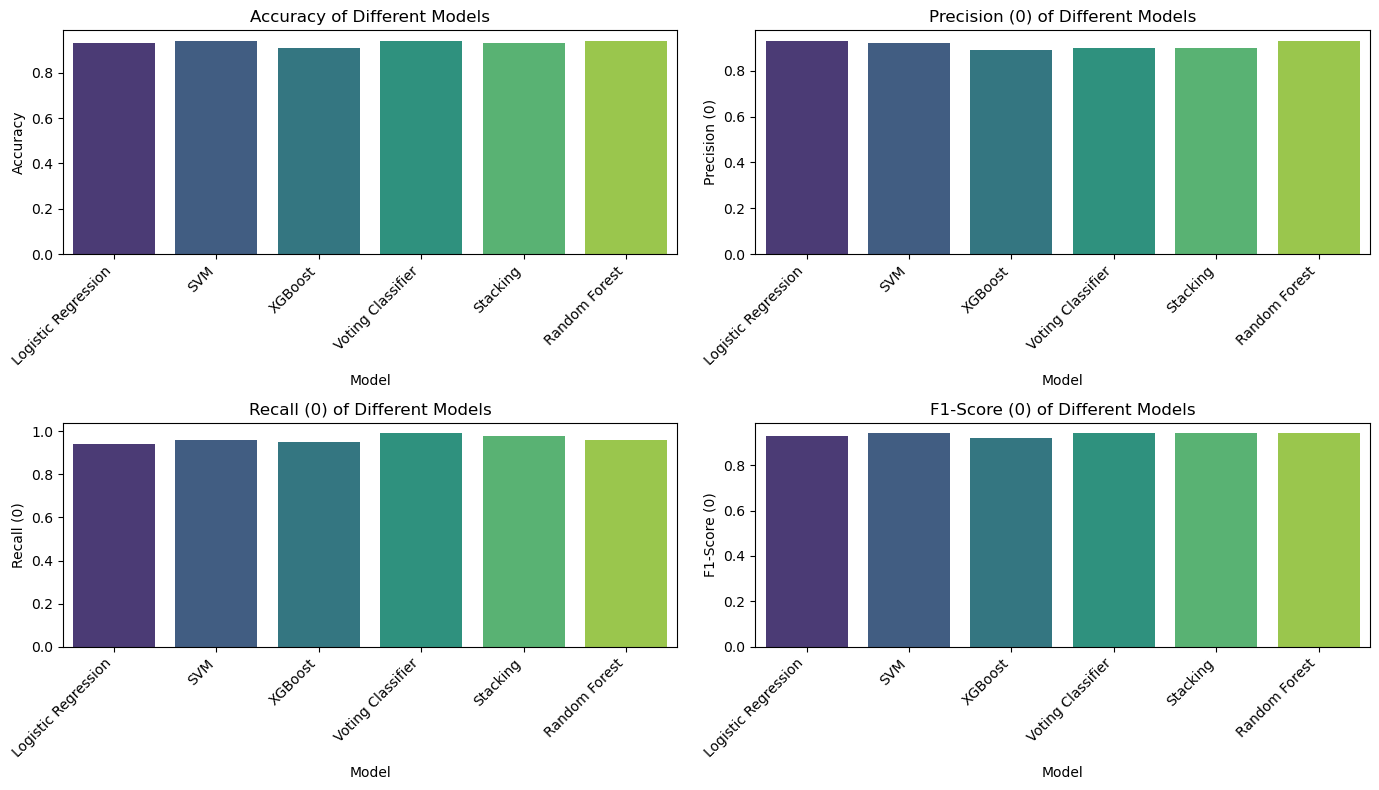

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with the performance metrics
data = {
    'Model': ['Logistic Regression', 'SVM', 'XGBoost', 'Voting Classifier', 'Stacking', 'Random Forest'],
    'Accuracy': [0.93, 0.94, 0.91, 0.94, 0.93, 0.94],
    'Precision (0)': [0.93, 0.92, 0.89, 0.90, 0.90, 0.93],
    'Recall (0)': [0.94, 0.96, 0.95, 0.99, 0.98, 0.96],
    'F1-Score (0)': [0.93, 0.94, 0.92, 0.94, 0.94, 0.94],
    'Precision (1)': [0.94, 0.96, 0.95, 0.99, 0.98, 0.96],
    'Recall (1)': [0.93, 0.92, 0.88, 0.89, 0.89, 0.93],
    'F1-Score (1)': [0.93, 0.94, 0.91, 0.94, 0.93, 0.94]
}

df = pd.DataFrame(data)

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Accuracy of Different Models')

# Plot Precision (0)
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision (0)', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Precision (0) of Different Models')

# Plot Recall (0)
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall (0)', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Recall (0) of Different Models')

# Plot F1-Score (0)
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1-Score (0)', data=df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('F1-Score (0) of Different Models')

# Adjust layout
plt.tight_layout()
plt.show()


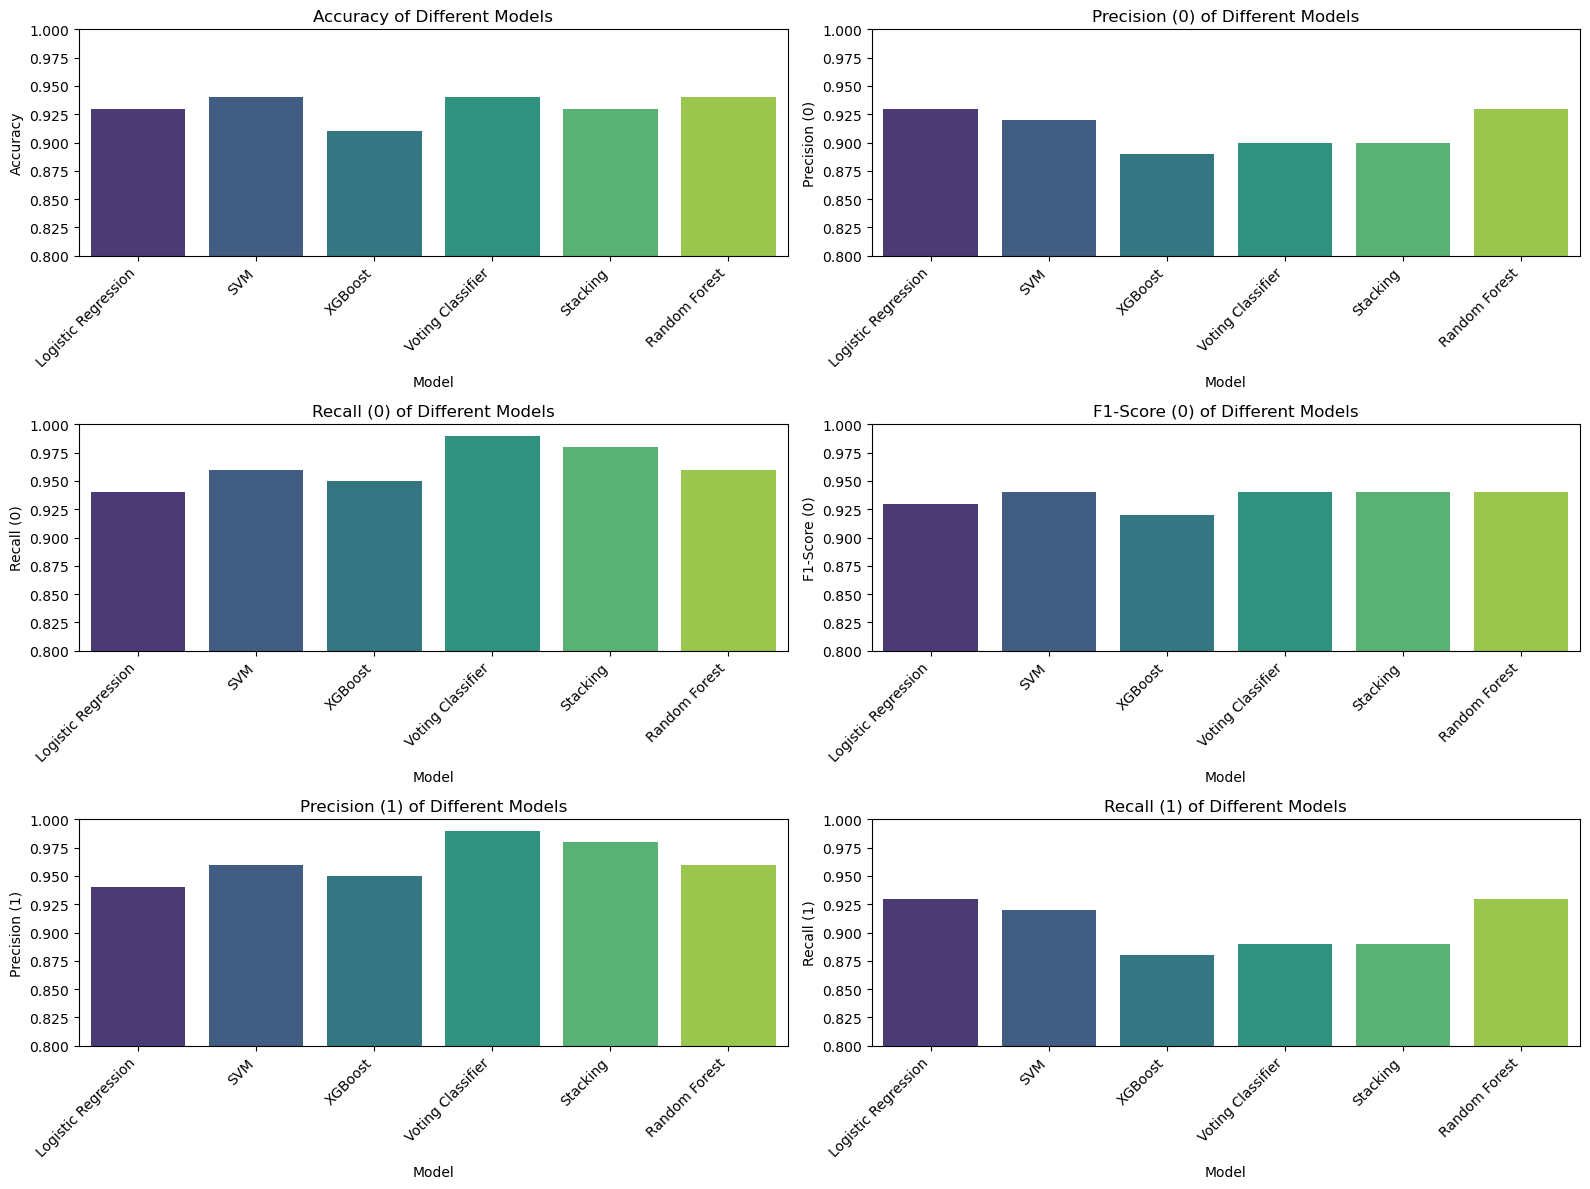

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with the performance metrics
data = {
    'Model': ['Logistic Regression', 'SVM', 'XGBoost', 'Voting Classifier', 'Stacking', 'Random Forest'],
    'Accuracy': [0.93, 0.94, 0.91, 0.94, 0.93, 0.94],
    'Precision (0)': [0.93, 0.92, 0.89, 0.90, 0.90, 0.93],
    'Recall (0)': [0.94, 0.96, 0.95, 0.99, 0.98, 0.96],
    'F1-Score (0)': [0.93, 0.94, 0.92, 0.94, 0.94, 0.94],
    'Precision (1)': [0.94, 0.96, 0.95, 0.99, 0.98, 0.96],
    'Recall (1)': [0.93, 0.92, 0.88, 0.89, 0.89, 0.93],
    'F1-Score (1)': [0.93, 0.94, 0.91, 0.94, 0.93, 0.94]
}

df = pd.DataFrame(data)

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Plot Accuracy
plt.subplot(3, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('Accuracy of Different Models')

# Plot Precision (0)
plt.subplot(3, 2, 2)
sns.barplot(x='Model', y='Precision (0)', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('Precision (0) of Different Models')

# Plot Recall (0)
plt.subplot(3, 2, 3)
sns.barplot(x='Model', y='Recall (0)', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('Recall (0) of Different Models')

# Plot F1-Score (0)
plt.subplot(3, 2, 4)
sns.barplot(x='Model', y='F1-Score (0)', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('F1-Score (0) of Different Models')

# Plot Precision (1)
plt.subplot(3, 2, 5)
sns.barplot(x='Model', y='Precision (1)', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('Precision (1) of Different Models')

# Plot Recall (1)
plt.subplot(3, 2, 6)
sns.barplot(x='Model', y='Recall (1)', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('Recall (1) of Different Models')

# Adjust layout
plt.tight_layout()
plt.show()


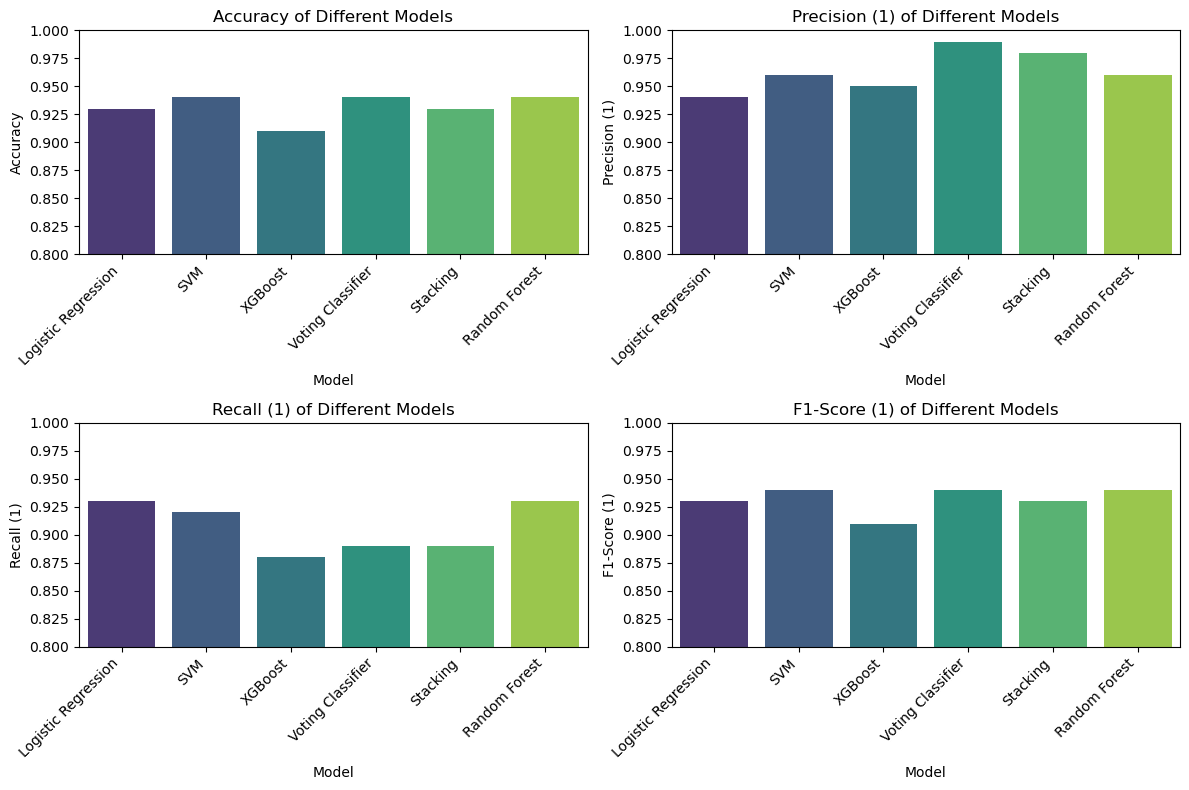

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with the performance metrics
data = {
    'Model': ['Logistic Regression', 'SVM', 'XGBoost', 'Voting Classifier', 'Stacking', 'Random Forest'],
    'Accuracy': [0.93, 0.94, 0.91, 0.94, 0.93, 0.94],
    'Precision (1)': [0.94, 0.96, 0.95, 0.99, 0.98, 0.96],
    'Recall (1)': [0.93, 0.92, 0.88, 0.89, 0.89, 0.93],
    'F1-Score (1)': [0.93, 0.94, 0.91, 0.94, 0.93, 0.94]
}

df = pd.DataFrame(data)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('Accuracy of Different Models')

# Plot Precision (1)
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision (1)', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('Precision (1) of Different Models')

# Plot Recall (1)
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall (1)', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('Recall (1) of Different Models')

# Plot F1-Score (1)
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1-Score (1)', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('F1-Score (1) of Different Models')

# Adjust layout
plt.tight_layout()

plt.savefig('model_performance.png', dpi=300)
plt.show()


C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning

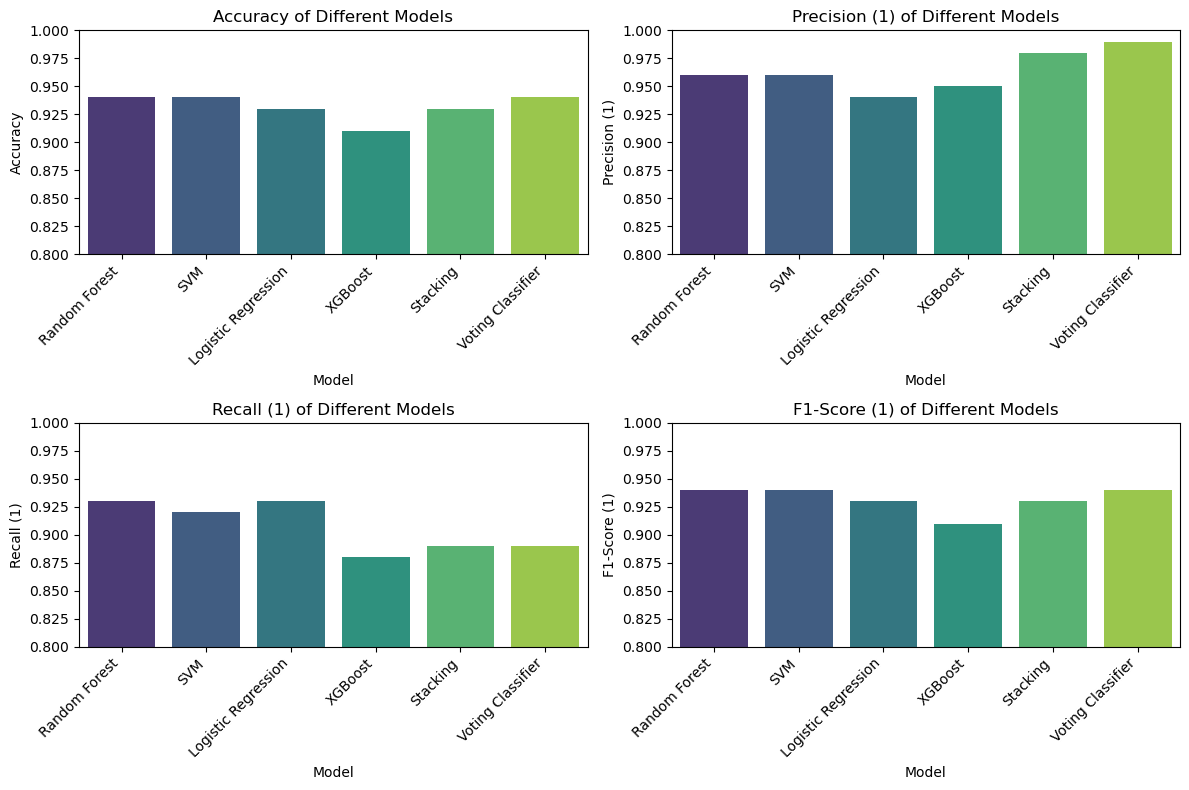

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with the performance metrics
data = {
    'Model': ['Logistic Regression', 'SVM', 'XGBoost', 'Voting Classifier', 'Stacking', 'Random Forest'],
    'Accuracy': [0.93, 0.94, 0.91, 0.94, 0.93, 0.94],
    'Precision (1)': [0.94, 0.96, 0.95, 0.99, 0.98, 0.96],
    'Recall (1)': [0.93, 0.92, 0.88, 0.89, 0.89, 0.93],
    'F1-Score (1)': [0.93, 0.94, 0.91, 0.94, 0.93, 0.94]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define the desired model order
model_order = ['Random Forest', 'SVM', 'Logistic Regression', 'XGBoost', 'Stacking', 'Voting Classifier']

# Reorder the DataFrame based on the specified model order
df['Model'] = pd.Categorical(df['Model'], categories=model_order, ordered=True)
df = df.sort_values('Model')

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot Accuracy
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('Accuracy of Different Models')

# Plot Precision (1)
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='Precision (1)', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('Precision (1) of Different Models')

# Plot Recall (1)
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='Recall (1)', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('Recall (1) of Different Models')

# Plot F1-Score (1)
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='F1-Score (1)', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('F1-Score (1) of Different Models')

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('model_performance.png', dpi=300)
plt.show()


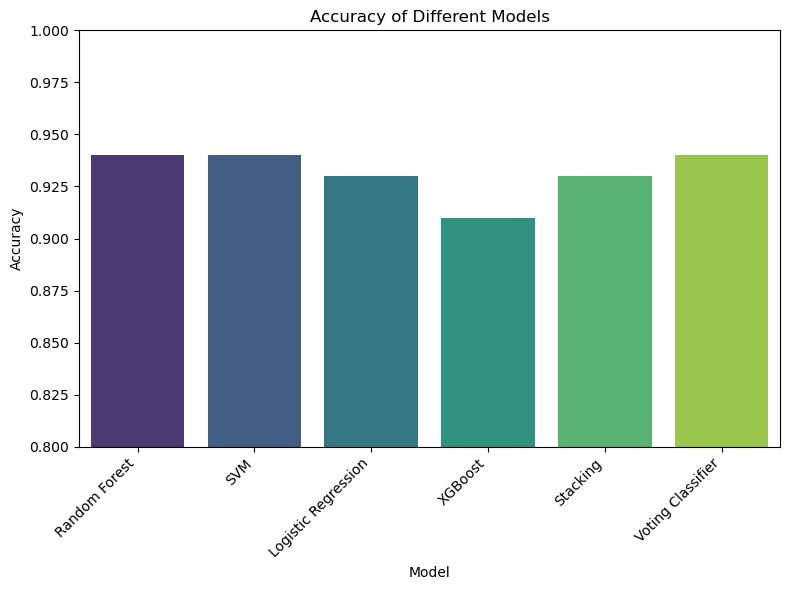

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with the performance metrics
data = {
    'Model': ['Random Forest', 'SVM', 'Logistic Regression', 'XGBoost', 'Stacking', 'Voting Classifier'],
    'Accuracy': [0.94, 0.94, 0.93, 0.91, 0.93, 0.94]
}

df = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(8,6))
sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('Accuracy of Different Models')

# Save and show the plot
plt.tight_layout()
plt.savefig('accuracy_plot.png', dpi=300)
plt.show()


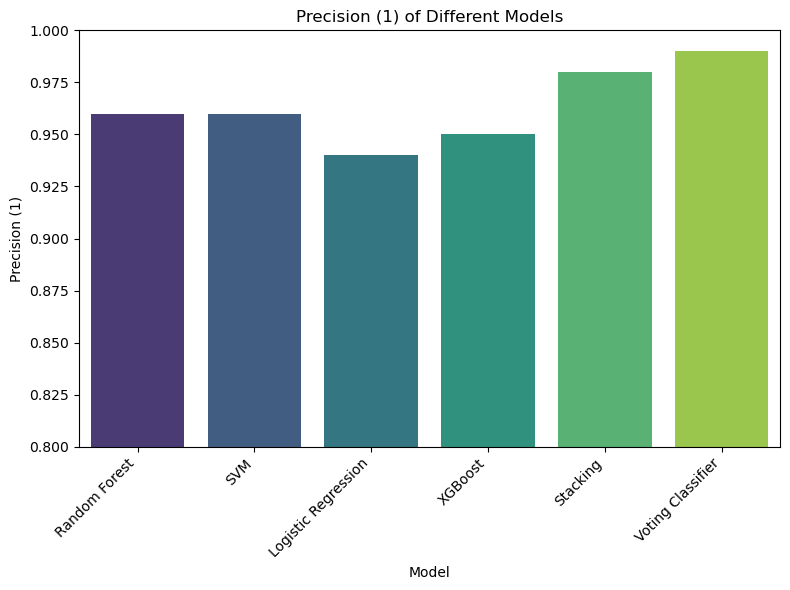

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with the performance metrics
data = {
    'Model': ['Random Forest', 'SVM', 'Logistic Regression', 'XGBoost', 'Stacking', 'Voting Classifier'],
    'Precision (1)': [0.96, 0.96, 0.94, 0.95, 0.98, 0.99]
}

df = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Precision (1)', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('Precision (1) of Different Models')

# Save and show the plot
plt.tight_layout()
plt.savefig('precision_plot.png', dpi=300)
plt.show()


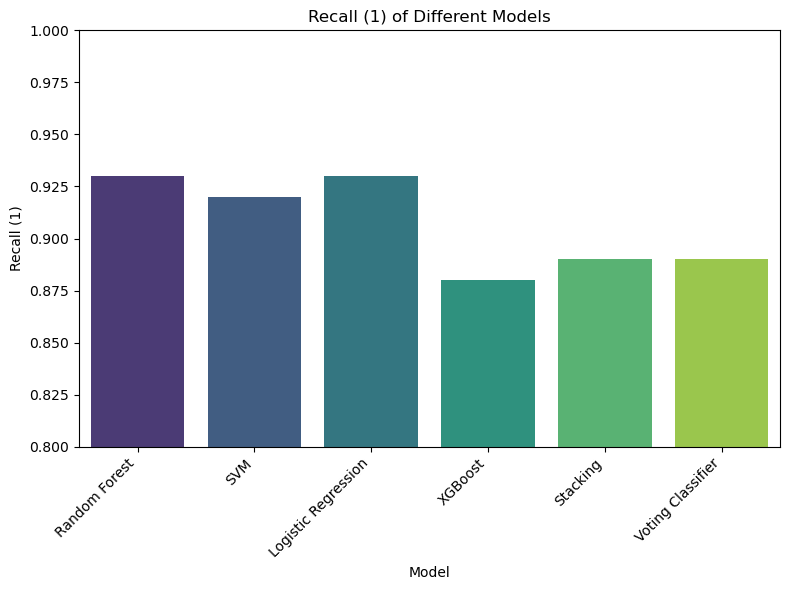

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with the performance metrics
data = {
    'Model': ['Random Forest', 'SVM', 'Logistic Regression', 'XGBoost', 'Stacking', 'Voting Classifier'],
    'Recall (1)': [0.93, 0.92, 0.93, 0.88, 0.89, 0.89]
}

df = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Recall (1)', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('Recall (1) of Different Models')

# Save and show the plot
plt.tight_layout()
plt.savefig('recall_plot.png', dpi=300)
plt.show()


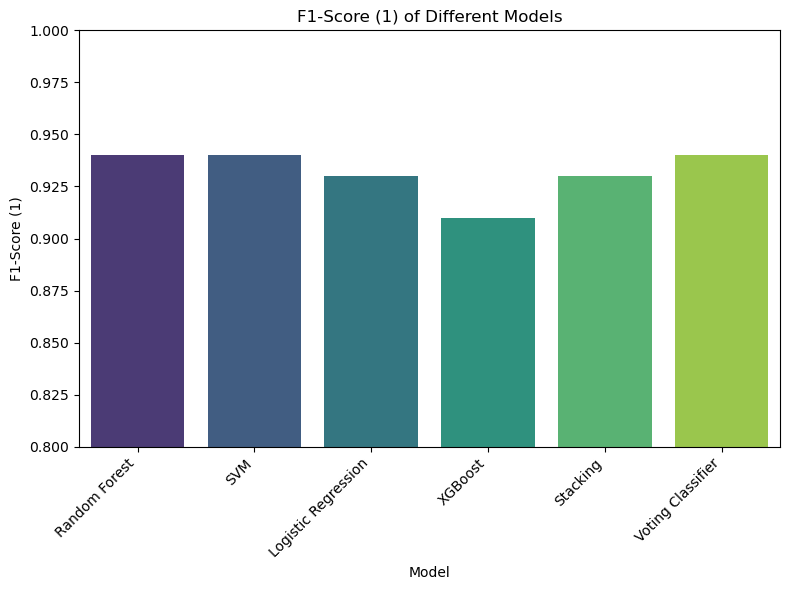

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with the performance metrics
data = {
    'Model': ['Random Forest', 'SVM', 'Logistic Regression', 'XGBoost', 'Stacking', 'Voting Classifier'],
    'F1-Score (1)': [0.94, 0.94, 0.93, 0.91, 0.93, 0.94]
}

df = pd.DataFrame(data)

# Set up the plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='F1-Score (1)', data=df, palette='viridis')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.title('F1-Score (1) of Different Models')

# Save and show the plot
plt.tight_layout()
plt.savefig('f1score_plot.png', dpi=300)
plt.show()
